## List comprehensions in Python

Python offers a convenient way to handle iterative structures (such as lists, set or dictionaries).  
It is considered good practice to be able to manipulate them fluently. Let's have a look why!

### Head-first into the topic!

In Python 3, the `range` keyword does not provide a list but a different structure that can easily be transformed into a list.

In [1]:
range(10)

range(0, 10)

In [2]:
type(range(10))  # this is not a list!

range

In [3]:
list(range(10))  # but you can make a list out of it

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The key point about this notation is performance: when you write `range(10000)`, you do not create a list of size 10000, but a structure that will give you a new integer each time you go through a loop.

In that perspective, you may be comfortable with the following snippet of code:

In [4]:
for i in range(10):
    print(i, end=" ")

0 1 2 3 4 5 6 7 8 9

Now, let's say we want to compute $x \mapsto 2\cdot x$ for each element of a given list (resp. range).  
Let us compare the two following ways of writing it.

In [5]:
a = range(1000000)

In [6]:
%%time
new_list = [2 * x for x in a]

CPU times: user 89.8 ms, sys: 37.5 ms, total: 127 ms
Wall time: 128 ms


In [7]:
%%time
new_list = []
for x in a:
    new_list.append(x)

CPU times: user 135 ms, sys: 27.1 ms, total: 162 ms
Wall time: 163 ms


<div class="alert alert-success">
<b>Definition:</b> Any syntax going like `[f(x) for x in array]` is referred to as <em>list comprehension</em>.  
</div>

<div class="alert alert-danger">
<b>Important note:</b> Besides being a more compact way to write things, list comprehension is also more efficient.
</div>

The official [docs.python.org](https://docs.python.org/) mentions it quickly [here](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) but let's go through this more into details.

### List comprehensions are not only about lists

List comprehensions are based on a Python specific data structure called a generator.  
You can manipulate a generator with brackets (no bracket results in a `SyntaxError`).

In [8]:
g = (str(i) for i in range(10))
type(g)

generator

You can construct any data structure that accept *iterable structures* with a generator.

In [9]:
list(g)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Note that the generator is now empty. You cannot build a second list from the same `g`:

In [10]:
list(g)

[]

So let's go through different constructions:
 - the regular Python `list`:

In [11]:
# equivalent notations for lists
list(str(i) for i in range(10))
[str(i) for i in range(10)]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

- the regular Python `set`:

In [12]:
# equivalent notations for sets
set(str(i) for i in range(10))
{str(i) for i in range(10)}

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

- even dictionaries (keyword `dict`) with the column character `:`

In [13]:
dict((i, str(i)) for i in range(10))
{i: str(i) for i in range(10)}

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9'}

There are actually other useful constructions, e.g. `sorted` that builds a sorted list from a generator:

In [14]:
[i * (-1) ** (i) for i in range(10)]

[0, -1, 2, -3, 4, -5, 6, -7, 8, -9]

In [15]:
sorted(i * (-1) ** (i) for i in range(10))

[-9, -7, -5, -3, -1, 0, 2, 4, 6, 8]

Building a `set` from the generator can also be useful as reflected on the following snippet:

In [16]:
[i ** 2 for i in range(-5, 5)]

[25, 16, 9, 4, 1, 0, 1, 4, 9, 16]

In [17]:
{i ** 2 for i in range(-5, 5)}

{0, 1, 4, 9, 16, 25}

You can also build there structures with more complex constructions.  
Recall the `enumerate` and/or `zip` constructions:

In [18]:
french = ["un", "deux", "trois", "cat", "sank"]
english = ["one", "two", "three", "four", "five"]

words = {i + 1: f for i, f in enumerate(zip(french, english))}

In [19]:
words

{1: ('un', 'one'),
 2: ('deux', 'two'),
 3: ('trois', 'three'),
 4: ('cat', 'four'),
 5: ('sank', 'five')}

Looping on a dictionary iterates on the keys:

In [25]:
[str(s) for s in words]

dict_items([(1, ('un', 'one')), (2, ('deux', 'two')), (3, ('trois', 'three')), (4, ('cat', 'four')), (5, ('sank', 'five'))])


But you can also use the `dict.items()` method.  
Here is an example to show there is “no” limit in how you can use list comprehensions.

In [41]:
for key, value in words.items():
    print(f"{key = } , {value = }")

key = 1 , value = ('un', 'one')
key = 2 , value = ('deux', 'two')
key = 3 , value = ('trois', 'three')
key = 4 , value = ('cat', 'four')
key = 5 , value = ('sank', 'five')


In [23]:
[
    [key, value[0], len(value[0]), value[1].upper(), len(value[1])]
    for key, value in words.items()
]

[[1, 'un', 2, 'ONE', 3],
 [2, 'deux', 4, 'TWO', 3],
 [3, 'trois', 5, 'THREE', 5],
 [4, 'cat', 3, 'FOUR', 4],
 [5, 'sank', 4, 'FIVE', 4]]

### Common loop patterns using list comprehensions

Check the difference between a `zip` and a double loop construction:

In [36]:
list(zip(french, english))

[('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('cat', 'four'),
 ('sank', 'five')]

In [37]:
[[(x, y) for x in french] for y in english]

[[('un', 'one'),
  ('deux', 'one'),
  ('trois', 'one'),
  ('cat', 'one'),
  ('sank', 'one')],
 [('un', 'two'),
  ('deux', 'two'),
  ('trois', 'two'),
  ('cat', 'two'),
  ('sank', 'two')],
 [('un', 'three'),
  ('deux', 'three'),
  ('trois', 'three'),
  ('cat', 'three'),
  ('sank', 'three')],
 [('un', 'four'),
  ('deux', 'four'),
  ('trois', 'four'),
  ('cat', 'four'),
  ('sank', 'four')],
 [('un', 'five'),
  ('deux', 'five'),
  ('trois', 'five'),
  ('cat', 'five'),
  ('sank', 'five')]]

In [38]:
[(x, y) for x in french for y in english]

[('un', 'one'),
 ('un', 'two'),
 ('un', 'three'),
 ('un', 'four'),
 ('un', 'five'),
 ('deux', 'one'),
 ('deux', 'two'),
 ('deux', 'three'),
 ('deux', 'four'),
 ('deux', 'five'),
 ('trois', 'one'),
 ('trois', 'two'),
 ('trois', 'three'),
 ('trois', 'four'),
 ('trois', 'five'),
 ('cat', 'one'),
 ('cat', 'two'),
 ('cat', 'three'),
 ('cat', 'four'),
 ('cat', 'five'),
 ('sank', 'one'),
 ('sank', 'two'),
 ('sank', 'three'),
 ('sank', 'four'),
 ('sank', 'five')]

<div class="alert alert-danger">
<b>Important note:</b> Be aware of which of the two for loops iterates faster
</div>

You can also add conditions within the list comprehension:

In [39]:
[a for a in range(10) if a % 2 == 0]

[0, 2, 4, 6, 8]

<div class="alert alert-warning">
<b>Exercice:</b> Use list comprehension to generate a list of $(a, b, c)$ integers such that $a^2 + b^2 = c^2$.
</div>

In [40]:
[
    (a, b, c)
    for a in range(1, 30)
    for b in range(a, 30)
    for c in range(b, 30)
    if a ** 2 + b ** 2 == c ** 2
]

[(3, 4, 5),
 (5, 12, 13),
 (6, 8, 10),
 (7, 24, 25),
 (8, 15, 17),
 (9, 12, 15),
 (10, 24, 26),
 (12, 16, 20),
 (15, 20, 25),
 (20, 21, 29)]

### Similar functions in numpy

Python loops are known to be expensive. List comprehensions help, but `numpy` takes a different approach by unfolding the loops using code written in C.

In [42]:
import numpy as np

In [43]:
%%time
new_list = [2 * x for x in range(1000000)]

CPU times: user 101 ms, sys: 20.2 ms, total: 121 ms
Wall time: 123 ms


In [44]:
a = np.arange(1000000)

In [45]:
%%time
new_list = 2 * a

CPU times: user 17.4 ms, sys: 17 ms, total: 34.4 ms
Wall time: 36.3 ms


<div class="alert alert-danger">
<b>Important note:</b> Although you cannot write as much in numpy as you can with list comprehension (because of the combination with the if construct), numpy remains the faster option.
</div>

* Nested comprehension may remind you the `meshgrid` function:

In [46]:
z = [[(x + y) for x in range(10)] for y in range(5)]
z

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

In [51]:
a, b = np.meshgrid(np.arange(10), np.arange(5))
c = a + b
# a
# b
c

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13]])

* You can go through elements of a 2D array with the following constructs:

In [52]:
[col[1] for col in z]

[1, 2, 3, 4, 5]

In [53]:
c[:, 1]

array([1, 2, 3, 4, 5])

Be careful though that `numpy` does not provide you a fresh copy of the array even if you create intermediate references.

In [54]:
d = c[:, 0]
d *= 0
c

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  5,  6,  7,  8,  9, 10, 11, 12, 13]])

### Yet another implementation for this old academic problem

Say we want to get all the prime numbers lesser than n.  
List comprehension can be a comfortable way to compute the sieve of Eratosthenes.

In [65]:
%%timeit
# First compute the non prime numbers
nope = [j for i in range(2, 8) for j in range(i * 2, 50, i)]
# Then build a new list not containing prime numbers
[x for x in range(2, 50) if x not in nope]

55.2 µs ± 4.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Actually the following implementation with `sets` may be more space and time efficient:

In [66]:
%%timeit
sieve = set(range(2, 50))
for i in range(2, 8):
    sieve -= set(range(2 * i, 50, i))

9.16 µs ± 346 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Another way to build your own generators

Let's recall the types of the structures we mentioned:

In [67]:
type(range(10))

range

In [68]:
type(i for i in range(10))

generator

Python provides a `yield` keyword in order to let you write your own generator objects.  
When the program hits a yield keyword:

1. it *yields* the current value,
2. then waits for the next iteration in a loop (see the `__next__` keyword),
3. then re-enters the program where it was last interrupted. 

The [Syracuse suite](https://en.wikipedia.org/wiki/Collatz_conjecture) is a good study case for this programming style.  
See in the `doctest` how we build the suite using the `list` constructor on a `generator` structure.

In [70]:
def syracuse(n):
    """Computes the Syracuse suite.
    
    >>> list(p for p in syracuse(28))
    [28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
    """
    assert n > 0
    yield n
    while n != 1:
        if n & 1 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        yield n

list(p for p in syracuse(28))

[28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]

In [76]:
def iter_down(n):
    assert n > 0
    yield n
    print("value:", n)
    while n > 0:
        print("in w value:", n)
        n -= 1
        yield n

list(p for p in iter_down(28))

value: 28
in w value: 28
in w value: 27
in w value: 26
in w value: 25
in w value: 24
in w value: 23
in w value: 22
in w value: 21
in w value: 20
in w value: 19
in w value: 18
in w value: 17
in w value: 16
in w value: 15
in w value: 14
in w value: 13
in w value: 12
in w value: 11
in w value: 10
in w value: 9
in w value: 8
in w value: 7
in w value: 6
in w value: 5
in w value: 4
in w value: 3
in w value: 2
in w value: 1


[28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 0]

An interesting plot to draw is the length of the Syracuse list for all integers within a certain range.  
See how confortable it can be to write it.

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

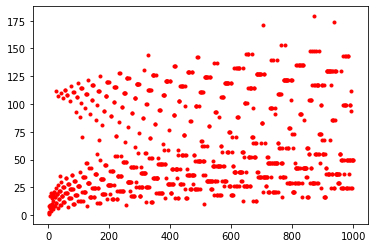

In [78]:
def length(iterable):
    """Length of a generator.
    
    The `len` keyword does not apply on generators.
    This makes the trick without expanding the list!
    """
    return sum(1 for _ in iterable)


# Note how we can pass a range to `plt.plot`, not necessarily a list
# Note the multi-level generator in the second part of the array
interval = range(1, 1000)
plt.plot(interval, [length(syracuse(i)) for i in interval], "r.")

In [79]:
[i for i in range(1, 50) if length(syracuse(i)) > 100]

[27, 31, 41, 47]

27 is the first integer when the Syracuse suite length exceeds 100.  
We can pretty-print the suite with another kind of list comprehension.

In [80]:
print(" ⇢ ".join(str(i) for i in syracuse(27)))

27 ⇢ 82 ⇢ 41 ⇢ 124 ⇢ 62 ⇢ 31 ⇢ 94 ⇢ 47 ⇢ 142 ⇢ 71 ⇢ 214 ⇢ 107 ⇢ 322 ⇢ 161 ⇢ 484 ⇢ 242 ⇢ 121 ⇢ 364 ⇢ 182 ⇢ 91 ⇢ 274 ⇢ 137 ⇢ 412 ⇢ 206 ⇢ 103 ⇢ 310 ⇢ 155 ⇢ 466 ⇢ 233 ⇢ 700 ⇢ 350 ⇢ 175 ⇢ 526 ⇢ 263 ⇢ 790 ⇢ 395 ⇢ 1186 ⇢ 593 ⇢ 1780 ⇢ 890 ⇢ 445 ⇢ 1336 ⇢ 668 ⇢ 334 ⇢ 167 ⇢ 502 ⇢ 251 ⇢ 754 ⇢ 377 ⇢ 1132 ⇢ 566 ⇢ 283 ⇢ 850 ⇢ 425 ⇢ 1276 ⇢ 638 ⇢ 319 ⇢ 958 ⇢ 479 ⇢ 1438 ⇢ 719 ⇢ 2158 ⇢ 1079 ⇢ 3238 ⇢ 1619 ⇢ 4858 ⇢ 2429 ⇢ 7288 ⇢ 3644 ⇢ 1822 ⇢ 911 ⇢ 2734 ⇢ 1367 ⇢ 4102 ⇢ 2051 ⇢ 6154 ⇢ 3077 ⇢ 9232 ⇢ 4616 ⇢ 2308 ⇢ 1154 ⇢ 577 ⇢ 1732 ⇢ 866 ⇢ 433 ⇢ 1300 ⇢ 650 ⇢ 325 ⇢ 976 ⇢ 488 ⇢ 244 ⇢ 122 ⇢ 61 ⇢ 184 ⇢ 92 ⇢ 46 ⇢ 23 ⇢ 70 ⇢ 35 ⇢ 106 ⇢ 53 ⇢ 160 ⇢ 80 ⇢ 40 ⇢ 20 ⇢ 10 ⇢ 5 ⇢ 16 ⇢ 8 ⇢ 4 ⇢ 2 ⇢ 1


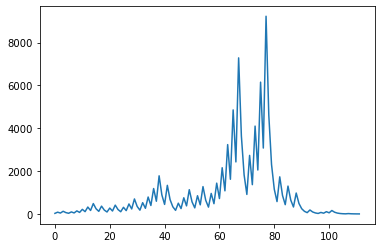

In [81]:
plt.plot(list(syracuse(27)))

We can see the suite goes up to 9232 (!) before coming back (quite fast) down to `[4, 2, 1]`.  
Another interesting plot shows the *height* of the suite for each integer.

<div class="alert alert-danger">
<b>Important note:</b> `max` is also a construction that accepts a generator as parameter!
</div>

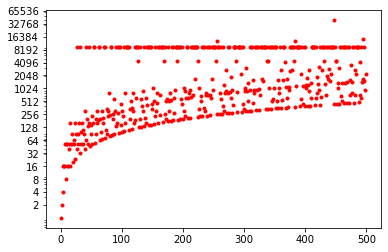

In [82]:
ax = plt.axes()
ax.set_yscale("log")
ax.set_yticks([1 << i for i in range(1, 17)])
ax.set_yticklabels([1 << i for i in range(1, 17)])

interval = range(1, 500)
ax.plot(interval, [max(syracuse(i)) for i in interval], "r.")

A last interesting graph plots the height of a suite depending on its length.

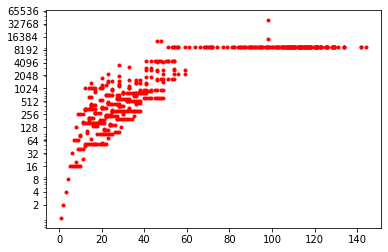

In [83]:
ax = plt.axes()
ax.set_yscale("log")
ax.set_yticks([1 << i for i in range(1, 17)])
ax.set_yticklabels([1 << i for i in range(1, 17)])

interval = range(1, 500)
ax.plot(
    [length(syracuse(i)) for i in interval], [max(syracuse(i)) for i in interval], "r."
)

### Read more about it

- The PEP about list comprehensions: https://www.python.org/dev/peps/pep-0202/
- An interesting story about code optimisation: https://www.python.org/doc/essays/list2str/
- More about this new notation: https://en.wikipedia.org/wiki/Set-builder_notation